In [1]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [3]:
X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [4]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [5]:
estimator = DecisionTreeClassifier(random_state = 1)
max_depth = list(range(1, 10))
param_grid = {'criterion':['gini'], 'max_depth': max_depth}
grid = GridSearchCV(estimator, param_grid=param_grid,cv=5,scoring='accuracy', verbose=1) 
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [6]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'criterion': 'gini', 'max_depth': 4}
best_score: 0.8833570412517779


In [7]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.8125

In [8]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0    0.760882
1    0.830014
2    0.872546
3    0.883357
4    0.877952
5    0.872546
6    0.872546
7    0.877809
8    0.872262
Name: mean_test_score, dtype: float64

In [9]:
# set Times New Roman as global font
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

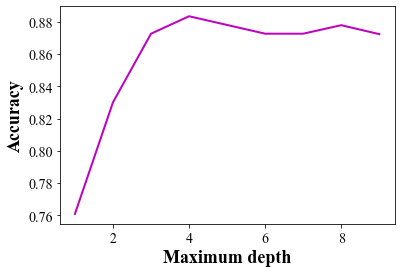

In [15]:
fig = plt.figure(1)
ax = plt.axes()

font = FontProperties()
font.set_name('Times New Roman')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

ax.set_xlabel('Maximum depth', fontsize=18, fontdict=dict(weight='bold'))
ax.set_ylabel('Accuracy', fontsize=18, fontdict=dict(weight='bold'))

graph = ax.plot(max_depth,df_mean, "m-", linewidth=2)